In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
import pandas as pd
import os
import glob


In [94]:
def evaluate( trainX , trainY , testX , testY,y_hat):
    print("\n#################\n")

    
    testY = trainY[0:50]
    trainY = trainY[0:50]
    trainX = trainX[0:50]
    testX = testX[0:50]
    y_hat = y_hat[0:50]
    rmse_tr =  metrics.mean_squared_error(trainY, y_hat)
    rmse_te =  metrics.mean_squared_error(testY, y_hat)

    mae_tr = metrics.mean_absolute_error(trainY, y_hat)
    mae_te = metrics.mean_absolute_error(testY, y_hat)

    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)

    print("MAE train:", mae_tr)
    print("MAE test:", mae_te)

    return rmse_tr , rmse_te ,mae_tr , mae_te


In [22]:
# list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files


dirty_training_set = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
dirty_training_set 

,x,t
0,0.754525,-0.999596
1,0.175460,0.892316
2,0.650307,-0.810148
3,0.416447,0.501196
4,0.221488,0.983996
...,...,...
125,0.794566,-0.966038
126,0.730350,-0.981837
127,0.565978,-0.389012
128,0.602873,-0.595402


In [44]:
df_test = pd.read_csv('data3.csv')

In [23]:
training_set = dirty_training_set.dropna() 

In [24]:
print ("Rows before clean: ", dirty_training_set.size, "\n")
print ("Rows after clean: ", training_set.size, "\n")

Rows before clean:  260 

Rows after clean:  260 



In [27]:
x_training_set = training_set['x'].values
y_training_set = training_set['t'].values

In [46]:
X_test = df_test['x'].values
y_test = df_test['t'].values

In [82]:
lin = LinearRegression()
lin.fit(x_training_set.reshape(-1,1),y_training_set)


y_hat1 = lin.predict(x_training_set.reshape(-1,1))

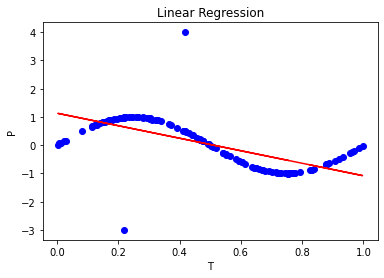

In [84]:
plt.scatter(x_training_set, y_training_set , color = 'blue')
plt.plot(x_training_set, y_hat1, color = 'red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('P')
  
plt.show()

In [95]:
print(evaluate( x_training_set, y_training_set , X_test , y_test,y_hat1))


#################

RMSE train: 0.12782852696756916
RMSE test: 0.12782852696756916
MAE train: 0.3076469812859178
MAE test: 0.3076469812859178
(0.12782852696756916, 0.12782852696756916, 0.3076469812859178, 0.3076469812859178)


In [77]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_training_set.reshape(-1,1))

poly.fit(X_poly, y_training_set)
lin2 = LinearRegression()
lin2.fit(X_poly, y_training_set)

y_hat2 = lin2.predict(poly.fit_transform(x_training_set.reshape(-1,1)))

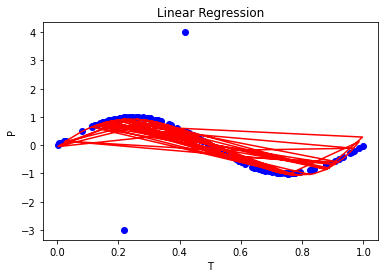

In [80]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(x_training_set, y_hat, color = 'red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('P')
  
plt.show()

In [97]:
print(evaluate( x_training_set, y_training_set , X_test , y_test,y_hat2))


#################

RMSE train: 0.00405042526241841
RMSE test: 0.00405042526241841
MAE train: 0.05617127549044475
MAE test: 0.05617127549044475
(0.00405042526241841, 0.00405042526241841, 0.05617127549044475, 0.05617127549044475)


In [78]:
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(x_training_set.reshape(-1,1))

poly.fit(X_poly, y_training_set)
lin2 = LinearRegression()
lin2.fit(X_poly, y_training_set)

y_hat3 = lin2.predict(poly.fit_transform(x_training_set.reshape(-1,1)))

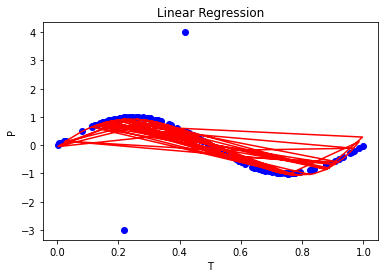

In [79]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(x_training_set, y_hat, color = 'red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('P')
  
plt.show()

In [96]:
print(evaluate( x_training_set, y_training_set , X_test , y_test,y_hat3))


#################

RMSE train: 0.005732837791566532
RMSE test: 0.005732837791566532
MAE train: 0.06615386733939586
MAE test: 0.06615386733939586
(0.005732837791566532, 0.005732837791566532, 0.06615386733939586, 0.06615386733939586)
